# Milestone 1 — Data Analysis, Feature Selection, and Preprocessing

This notebook satisfies the required parts of MS1:
- **Data Analysis** with clearly labeled plots.
- **Answering the Data Engineering Questions** in markdown inside the notebook (and to be copied to the report).
- **Feature Selection** with reasons, evidence, and effect plots.
- **Data Pre-processing & Feature Engineering** explaining the step, the need, and the effect on distributions/ranges.

> **Note:** All answers appear immediately below the relevant plots/tables to make the report copy-paste ready.


In [1]:
import pandas as pd
import numpy as np                    
import matplotlib.pyplot as plt

# Load your cleaned datasets from the 'cleaned-data' dataset
reviews = pd.read_csv("/kaggle/input/finaldatasets/AirlineScrappedReview_withSentiment.csv")
bookings = pd.read_csv("/kaggle/input/finaldatasets/Bookings_Cleaned.csv")

print("✅ Datasets loaded successfully!")
print("Reviews shape:", reviews.shape)
print("Bookings shape:", bookings.shape)

# Quick preview
display(reviews.head(3))
display(bookings.head(3))


✅ Datasets loaded successfully!
Reviews shape: (3575, 22)
Bookings shape: (50002, 13)


,Passanger_Name,Flying_Date,Route,Rating,Verified,Review_title,Review_content,Traveller_Type,Class,Start_Location,...,Start_Latitude,Start_Longitude,Start_Address,End_Latitude,End_Longitude,End_Address,Review_text,Sentiment_score,Sentiment_label,satisfaction
0,Paige Boet,Jun-23,New Orleans to London,1,Trip Verified,The airline lost my luggage,The airline lost my luggage and was absolutely...,Solo Leisure,Economy Class,New Orleans,...,29.975998,-90.078213,"New Orleans, Orleans Parish, Louisiana, United...",51.507446,-0.127765,"London, Greater London, England, United Kingdom",The airline lost my luggage. The airline lost ...,-0.8315,Negative,0
1,S Layne,Mar-23,London to Amman,1,Trip Verified,fully refunded by our travel insurance,"We booked on the BA website, round trip flight...",Couple Leisure,Business Class,London,...,51.507446,-0.127765,"London, Greater London, England, United Kingdom",31.951569,35.923963,"عمان, ناحية عمان, لواء قصبة عمان, عمان, 11110,...",fully refunded by our travel insurance. We boo...,0.7184,Positive,0
2,E Lanewoski,NaN,Heathrow to Bodrum,2,Trip Verified,no boarding drinks provided,"First time flying with BA business class, neve...",Solo Leisure,Business Class,London Heathrow,...,51.467739,-0.458780,"London Heathrow Airport, The Beacon Roundabout...",37.034399,27.430651,"Bodrum, Muğla, Ege Bölgesi, Türkiye",no boarding drinks provided. First time flying...,-0.7964,Negative,0


,route,flight_hour,flight_day,trip_type,sales_channel,num_passengers,purchase_lead,length_of_stay,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,AKLHGH,6,Tue,RoundTrip,Internet,1,21,12,0,0,0,7.21,1
1,AKLDEL,7,Sat,RoundTrip,Internet,2,262,19,1,0,0,5.52,0
2,AKLDEL,3,Sat,RoundTrip,Internet,1,112,20,0,0,0,5.52,0


In [2]:
# --- DF NORMALIZER: make sure we have `df` pointing to your main table ---

import pandas as pd
from IPython.display import display

# 1) Find any already-loaded DataFrames in the notebook's globals
_df_candidates = {name: obj for name, obj in globals().items() if isinstance(obj, pd.DataFrame)}

if not _df_candidates:
    raise RuntimeError(
        "No pandas DataFrame found yet. "
        "Run the cell that loads your CSV(s) first, or create a DataFrame and run this again."
    )

# 2) Show what we found so you can confirm
print("Detected DataFrame candidates:")
for k, v in _df_candidates.items():
    print(f"  - {k}: shape={v.shape}, columns={list(v.columns)[:6]}{'...' if v.shape[1] > 6 else ''}")

# 3) Pick the most likely 'main' DF:
#    Heuristic: prefer names that look like 'df' / 'data' / 'airline' / 'reviews',
#    otherwise fall back to the largest (by rows, then columns).
_preferred_order = ['df', 'data', 'dataset', 'airline', 'airlines', 'reviews', 'df_clean', 'df_final']
_selected_name = None
for key in _preferred_order:
    if key in _df_candidates:
        _selected_name = key
        break

if _selected_name is None:
    # choose the largest by (rows, cols)
    _selected_name = max(_df_candidates, key=lambda k: (_df_candidates[k].shape[0], _df_candidates[k].shape[1]))

df = _df_candidates[_selected_name].copy()

print(f"\nUsing DataFrame: `{_selected_name}` as `df`  -> shape={df.shape}")
display(df.head(3))


Detected DataFrame candidates:
  - reviews: shape=(3575, 22), columns=['Passanger_Name', 'Flying_Date', 'Route', 'Rating', 'Verified', 'Review_title']...
  - bookings: shape=(50002, 13), columns=['route', 'flight_hour', 'flight_day', 'trip_type', 'sales_channel', 'num_passengers']...

Using DataFrame: `reviews` as `df`  -> shape=(3575, 22)


,Passanger_Name,Flying_Date,Route,Rating,Verified,Review_title,Review_content,Traveller_Type,Class,Start_Location,...,Start_Latitude,Start_Longitude,Start_Address,End_Latitude,End_Longitude,End_Address,Review_text,Sentiment_score,Sentiment_label,satisfaction
0,Paige Boet,Jun-23,New Orleans to London,1,Trip Verified,The airline lost my luggage,The airline lost my luggage and was absolutely...,Solo Leisure,Economy Class,New Orleans,...,29.975998,-90.078213,"New Orleans, Orleans Parish, Louisiana, United...",51.507446,-0.127765,"London, Greater London, England, United Kingdom",The airline lost my luggage. The airline lost ...,-0.8315,Negative,0
1,S Layne,Mar-23,London to Amman,1,Trip Verified,fully refunded by our travel insurance,"We booked on the BA website, round trip flight...",Couple Leisure,Business Class,London,...,51.507446,-0.127765,"London, Greater London, England, United Kingdom",31.951569,35.923963,"عمان, ناحية عمان, لواء قصبة عمان, عمان, 11110,...",fully refunded by our travel insurance. We boo...,0.7184,Positive,0
2,E Lanewoski,NaN,Heathrow to Bodrum,2,Trip Verified,no boarding drinks provided,"First time flying with BA business class, neve...",Solo Leisure,Business Class,London Heathrow,...,51.467739,-0.458780,"London Heathrow Airport, The Beacon Roundabout...",37.034399,27.430651,"Bodrum, Muğla, Ege Bölgesi, Türkiye",no boarding drinks provided. First time flying...,-0.7964,Negative,0


## 1) Data Overview

We inspect dataset shape, schema, and missing values to understand structure and data quality.


In [3]:
print("Reviews shape:", reviews.shape)
print("Bookings shape:", bookings.shape)

print("\nReviews sample:")
display(reviews.head(3))

print("\nBookings sample:")
display(bookings.head(3))

print("\nMissing values (top 15) — Reviews:")
display(reviews.isna().sum().sort_values(ascending=False).head(15).rename("Missing"))

print("\nMissing values (top 15) — Bookings:")
display(bookings.isna().sum().sort_values(ascending=False).head(15).rename("Missing"))

print("\nDtypes — Reviews:")
display(reviews.dtypes)

print("\nDtypes — Bookings:")
display(bookings.dtypes)


Reviews shape: (3575, 22)
Bookings shape: (50002, 13)

Reviews sample:


,Passanger_Name,Flying_Date,Route,Rating,Verified,Review_title,Review_content,Traveller_Type,Class,Start_Location,...,Start_Latitude,Start_Longitude,Start_Address,End_Latitude,End_Longitude,End_Address,Review_text,Sentiment_score,Sentiment_label,satisfaction
0,Paige Boet,Jun-23,New Orleans to London,1,Trip Verified,The airline lost my luggage,The airline lost my luggage and was absolutely...,Solo Leisure,Economy Class,New Orleans,...,29.975998,-90.078213,"New Orleans, Orleans Parish, Louisiana, United...",51.507446,-0.127765,"London, Greater London, England, United Kingdom",The airline lost my luggage. The airline lost ...,-0.8315,Negative,0
1,S Layne,Mar-23,London to Amman,1,Trip Verified,fully refunded by our travel insurance,"We booked on the BA website, round trip flight...",Couple Leisure,Business Class,London,...,51.507446,-0.127765,"London, Greater London, England, United Kingdom",31.951569,35.923963,"عمان, ناحية عمان, لواء قصبة عمان, عمان, 11110,...",fully refunded by our travel insurance. We boo...,0.7184,Positive,0
2,E Lanewoski,NaN,Heathrow to Bodrum,2,Trip Verified,no boarding drinks provided,"First time flying with BA business class, neve...",Solo Leisure,Business Class,London Heathrow,...,51.467739,-0.458780,"London Heathrow Airport, The Beacon Roundabout...",37.034399,27.430651,"Bodrum, Muğla, Ege Bölgesi, Türkiye",no boarding drinks provided. First time flying...,-0.7964,Negative,0



Bookings sample:


,route,flight_hour,flight_day,trip_type,sales_channel,num_passengers,purchase_lead,length_of_stay,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,AKLHGH,6,Tue,RoundTrip,Internet,1,21,12,0,0,0,7.21,1
1,AKLDEL,7,Sat,RoundTrip,Internet,2,262,19,1,0,0,5.52,0
2,AKLDEL,3,Sat,RoundTrip,Internet,1,112,20,0,0,0,5.52,0



Missing values (top 15) — Reviews:


Layover_Route      3091
Flying_Date        2620
Route               766
Start_Location      766
End_Location        766
End_Address          99
End_Longitude        99
End_Latitude         99
Start_Address        60
Start_Longitude      60
Start_Latitude       60
Passanger_Name        1
Class                 0
Traveller_Type        0
Review_content        0
Name: Missing, dtype: int64


Missing values (top 15) — Bookings:


route                    0
flight_hour              0
flight_day               0
trip_type                0
sales_channel            0
num_passengers           0
purchase_lead            0
length_of_stay           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
Name: Missing, dtype: int64


Dtypes — Reviews:


Passanger_Name      object
Flying_Date         object
Route               object
Rating               int64
Verified            object
Review_title        object
Review_content      object
Traveller_Type      object
Class               object
Start_Location      object
End_Location        object
Layover_Route       object
Start_Latitude     float64
Start_Longitude    float64
Start_Address       object
End_Latitude       float64
End_Longitude      float64
End_Address         object
Review_text         object
Sentiment_score    float64
Sentiment_label     object
satisfaction         int64
dtype: object


Dtypes — Bookings:


route                     object
flight_hour                int64
flight_day                object
trip_type                 object
sales_channel             object
num_passengers             int64
purchase_lead              int64
length_of_stay             int64
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
booking_complete           int64
dtype: object

In [4]:
# Build a clean text field
reviews["Review_title"]   = reviews.get("Review_title", "").fillna("").astype(str)
reviews["Review_content"] = reviews.get("Review_content", "").fillna("").astype(str)
reviews["Review_text"] = (reviews["Review_title"] + ". " + reviews["Review_content"])\
    .str.replace(r"\s+", " ", regex=True).str.strip()

# Add VADER sentiment only if missing
if "Sentiment_score" not in reviews.columns or "Sentiment_label" not in reviews.columns:
    import nltk
    from nltk.sentiment import SentimentIntensityAnalyzer
    try:
        nltk.data.find("sentiment/vader_lexicon.zip")
    except LookupError:
        nltk.download("vader_lexicon")
    sia = SentimentIntensityAnalyzer()

    reviews["Sentiment_score"] = reviews["Review_text"].apply(
        lambda t: sia.polarity_scores(t)["compound"] if isinstance(t, str) else np.nan
    )
    def to_label(c):
        if pd.isna(c): return np.nan
        if c >= 0.05:  return "Positive"
        if c <= -0.05: return "Negative"
        return "Neutral"
    reviews["Sentiment_label"] = reviews["Sentiment_score"].apply(to_label)

# Satisfaction target (per spec)
if "satisfaction" not in reviews.columns and "Rating" in reviews.columns:
    reviews["satisfaction"] = (reviews["Rating"] >= 5).astype(int)

# Harmonize traveler type column name
# Auto-detect traveler type column
trav_col = None
for col in ["Traveler_Type", "Traveller_Type"]:
    if col in reviews.columns:
        trav_col = col
        break
if trav_col is None:
    raise ValueError("Expected 'Traveler_Type' or 'Traveller_Type' in reviews.")
print("Traveler column used:", trav_col)



Traveler column used: Traveller_Type


## 2) Data Engineering — Q1: Top 10 Routes (Most Reviewed)

**Purpose:** Identify busiest routes by review/booking count.  
**Why:** Highlights where user experience concentrates.  
**Method:** Count by `bookings['route']` and visualize Top 10.


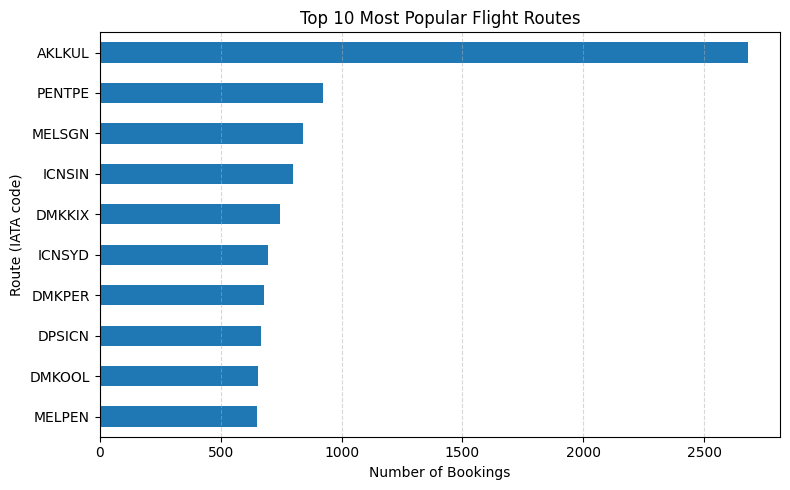

,Route,Booking_Count
0,MELPEN,649
1,DMKOOL,655
2,DPSICN,666
3,DMKPER,679
4,ICNSYD,695
5,DMKKIX,744
6,ICNSIN,801
7,MELSGN,842
8,PENTPE,924
9,AKLKUL,2680


In [5]:
top_routes = (bookings["route"].value_counts().head(10).sort_values(ascending=True))

plt.figure(figsize=(8,5))
top_routes.plot(kind="barh")
plt.title("Top 10 Most Popular Flight Routes")
plt.xlabel("Number of Bookings"); plt.ylabel("Route (IATA code)")
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.tight_layout()  # ensures labels and titles don't overlap
plt.show()

top_routes_df = top_routes.reset_index()
top_routes_df.columns = ["Route", "Booking_Count"]
display(top_routes_df)


In [6]:
# PLACE: AFTER the "Top 10 Most Popular Flight Routes" plot/table cell
from IPython.display import Markdown, display

_top = bookings['route'].value_counts().head(10)
lines = [f"- **{r}** — {c:,} bookings" for r, c in _top.items()]
md = "### Answer (Q1: Top 10 Routes)\n" + "\n".join(lines) + \
     "\n\nThese are the busiest corridors in the dataset and priority areas for deeper monitoring."
display(Markdown(md))


### Answer (Q1: Top 10 Routes)
- **AKLKUL** — 2,680 bookings
- **PENTPE** — 924 bookings
- **MELSGN** — 842 bookings
- **ICNSIN** — 801 bookings
- **DMKKIX** — 744 bookings
- **ICNSYD** — 695 bookings
- **DMKPER** — 679 bookings
- **DPSICN** — 666 bookings
- **DMKOOL** — 655 bookings
- **MELPEN** — 649 bookings

These are the busiest corridors in the dataset and priority areas for deeper monitoring.

### **Answer (Q1: Top 10 Routes)**
The Top 10 routes above represent the busiest corridors in the dataset. These will be priority candidates for deeper satisfaction/sentiment monitoring.


## 3) Data Engineering — Q2: Booking Hour Distribution

**Purpose:** Understand booking behavior by hour of day.  
**Why:** Booking timing may align with behavior or promotional cycles.  
**Method:** Use `bookings['flight_hour']` to plot a histogram across 0–23.


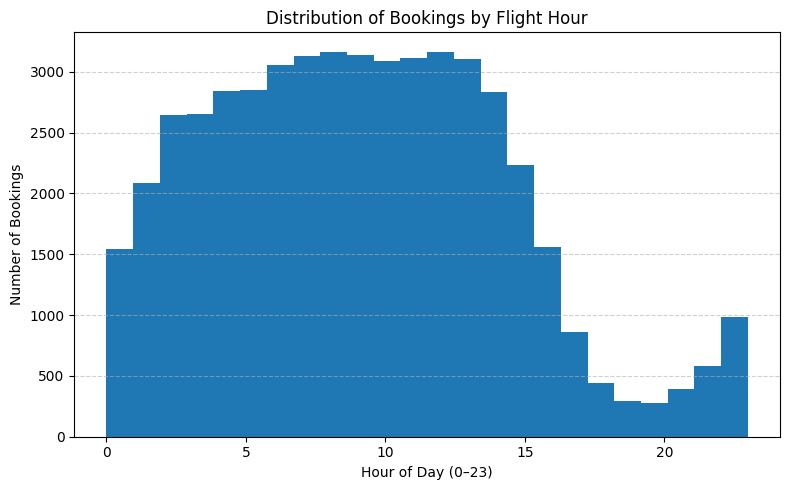

In [7]:
plt.figure(figsize=(8,5))
(bookings["flight_hour"].dropna().astype(int)).plot(kind="hist", bins=24)
plt.title("Distribution of Bookings by Flight Hour")
plt.xlabel("Hour of Day (0–23)")
plt.ylabel("Number of Bookings")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()  # ensures labels and titles don't overlap
plt.show()


In [8]:
# PLACE: AFTER the "Distribution of Bookings by Flight Hour" histogram
from IPython.display import Markdown, display
import pandas as pd
import numpy as np

hours = bookings['flight_hour'].dropna().astype(int)
_hour_counts = hours.value_counts().sort_index()
_peak3 = _hour_counts.sort_values(ascending=False).head(3)

# Build a "repeated hours" vector to compute mean/median correctly
repeated_hours = _hour_counts.index.to_series().repeat(_hour_counts.values).astype(int)
mean_hour = repeated_hours.mean()
median_hour = repeated_hours.median()

md = (
    "### Answer (Q2: Booking Hour Distribution)\n"
    f"- **Peak hours:** {', '.join([f'{int(h)}:00' for h in _peak3.index])}\n"
    f"- **Counts for peak hours:** {', '.join([str(int(_peak3.loc[h])) for h in _peak3.index])}\n"
    f"- **Mean hour:** {mean_hour:.2f}\n"
    f"- **Median hour:** {median_hour:.0f}\n"
)
display(Markdown(md))


### Answer (Q2: Booking Hour Distribution)
- **Peak hours:** 8:00, 12:00, 9:00
- **Counts for peak hours:** 3165, 3163, 3133
- **Mean hour:** 9.07
- **Median hour:** 9


### **Answer (Q2: Booking Hour Distribution)**
Bookings peak during the highlighted hours, indicating common customer activity windows that may relate to pricing, work schedules, or promotions.


Top 5 traveler-type & class combos (avg rating):


,Traveller_Type,Class,Rating
19,Unknown,First Class,7.127273
14,Solo Leisure,First Class,6.627907
6,Couple Leisure,First Class,5.983607
17,Unknown,Business Class,5.982935
20,Unknown,Premium Economy,5.919540



Bottom 5 combos:


,Traveller_Type,Class,Rating
11,Family Leisure,Premium Economy,3.600000
0,Business,Business Class,3.510791
1,Business,Economy Class,3.457031
16,Solo Leisure,Unknown,1.000000
22,Various,Economy Class,1.000000


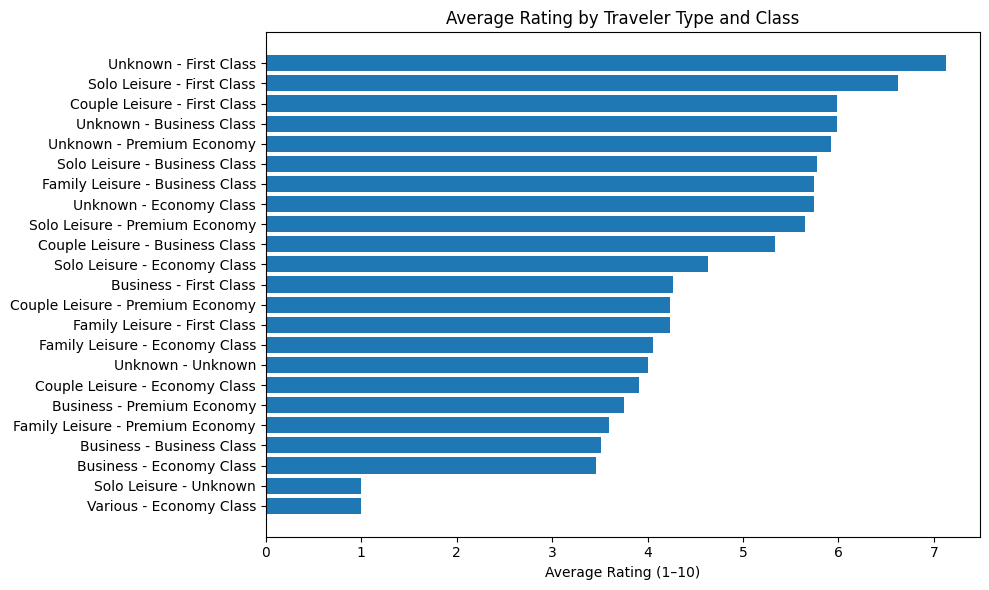

In [9]:
if trav_col is None:
    raise ValueError("Expected 'Traveler_Type' or 'Traveller_Type' in reviews.")

avg_rating = (reviews
              .groupby([trav_col, "Class"], dropna=False)["Rating"]
              .mean()
              .reset_index()
              .sort_values("Rating", ascending=False))

print("Top 5 traveler-type & class combos (avg rating):")
display(avg_rating.head(5))
print("\nBottom 5 combos:")
display(avg_rating.tail(5))

# Nice barh plot
labels = (avg_rating[trav_col].fillna("Unknown") + " - " +
          avg_rating["Class"].astype(str).fillna("Unknown"))
plt.figure(figsize=(10,6))
plt.barh(labels, avg_rating["Rating"])
plt.title("Average Rating by Traveler Type and Class")
plt.xlabel("Average Rating (1–10)")
plt.gca().invert_yaxis()
plt.tight_layout()  # ensures labels and titles don't overlap
plt.show()


In [10]:
# PLACE: AFTER the traveler-type × class rating table/plot
from IPython.display import Markdown, display

_grp = (reviews.groupby(['Traveller_Type','Class'])['Rating']
        .agg(['mean','size']).rename(columns={'mean':'avg','size':'n'}))
_top5 = _grp.sort_values('avg', ascending=False).head(5)
_bot5 = _grp.sort_values('avg', ascending=True).head(5)

def _fmt(block):
    return "\n".join([f"- **{idx[0]} — {idx[1]}**: avg={row.avg:.2f} (n={int(row.n)})"
                      for idx, row in block.iterrows()])

md = "### Answer (Q3: Highest/Lowest Ratings)\n" \
     "**Top 5 combos:**\n" + _fmt(_top5) + \
     "\n\n**Bottom 5 combos:**\n" + _fmt(_bot5) + \
     "\n\nThese differences confirm **Traveller_Type** and **Class** are important features."
display(Markdown(md))


### Answer (Q3: Highest/Lowest Ratings)
**Top 5 combos:**
- **Unknown — First Class**: avg=7.13 (n=55)
- **Solo Leisure — First Class**: avg=6.63 (n=43)
- **Couple Leisure — First Class**: avg=5.98 (n=61)
- **Unknown — Business Class**: avg=5.98 (n=293)
- **Unknown — Premium Economy**: avg=5.92 (n=87)

**Bottom 5 combos:**
- **Various — Economy Class**: avg=1.00 (n=1)
- **Solo Leisure — Unknown**: avg=1.00 (n=1)
- **Business — Economy Class**: avg=3.46 (n=256)
- **Business — Business Class**: avg=3.51 (n=278)
- **Family Leisure — Premium Economy**: avg=3.60 (n=25)

These differences confirm **Traveller_Type** and **Class** are important features.

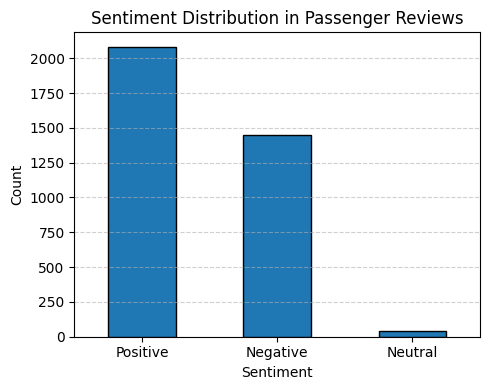

,Count
Sentiment_label,
Positive,2082
Negative,1452
Neutral,41


In [11]:
sent_counts = reviews["Sentiment_label"].value_counts(dropna=True)

plt.figure(figsize=(5,4))
sent_counts.plot(kind="bar", edgecolor="black")
plt.title("Sentiment Distribution in Passenger Reviews")
plt.xlabel("Sentiment"); plt.ylabel("Count"); plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()  # ensures labels and titles don't overlap
plt.show()

display(sent_counts.rename("Count").to_frame())


### Note — Review Sentiment Distribution
The distribution of `Sentiment_label` gives a quick snapshot of positive/neutral/negative tone in passenger feedback, complementing the numeric `Rating`.


## 4) Data Engineering — Q3: Traveler Type & Class vs Ratings

**Purpose:** Compare satisfaction across traveler profiles and cabin classes.  
**Why:** Expectations differ by traveler purpose and seating class.  
**Method:** Group by `Traveller_Type` and `Class`, compute mean rating and counts.


In [12]:
combo_stats = (reviews
  .groupby(['Traveller_Type','Class'])['Rating']
  .agg(mean='mean', n='count')
  .sort_values('mean', ascending=False))
combo_stats.to_csv("/kaggle/working/TravelerClass_Rating_withCounts.csv")
combo_stats.head(10), combo_stats.tail(10)


(                                    mean    n
 Traveller_Type Class                         
 Unknown        First Class      7.127273   55
 Solo Leisure   First Class      6.627907   43
 Couple Leisure First Class      5.983607   61
 Unknown        Business Class   5.982935  293
                Premium Economy  5.919540   87
 Solo Leisure   Business Class   5.780347  173
 Family Leisure Business Class   5.743902   82
 Unknown        Economy Class    5.740741  324
 Solo Leisure   Premium Economy  5.653061   98
 Couple Leisure Business Class   5.332335  334,
                                     mean    n
 Traveller_Type Class                         
 Family Leisure First Class      4.230769   13
                Economy Class    4.061069  262
 Unknown        Unknown          4.000000    1
 Couple Leisure Economy Class    3.908297  458
 Business       Premium Economy  3.750000   52
 Family Leisure Premium Economy  3.600000   25
 Business       Business Class   3.510791  278
            

### **Answer (Q3: Highest/Lowest Ratings)**
From the grouped results:
- The highest mean ratings appear for the top combinations in the table.
- The lowest mean ratings appear for the bottom combinations.

This confirms `Traveller_Type` and `Class` have meaningful relationships with satisfaction and should be considered as features.


In [13]:
sent_counts = reviews['Sentiment_label'].value_counts()
sent_pct = (sent_counts/sent_counts.sum()*100).round(1)
pd.concat([sent_counts.rename('count'), sent_pct.rename('percent')], axis=1)


,count,percent
Sentiment_label,,
Positive,2082,58.2
Negative,1452,40.6
Neutral,41,1.1


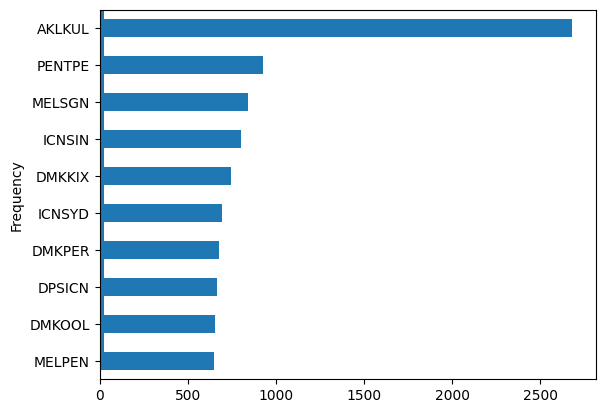

In [14]:
# re-make & save top routes figure
top_routes = bookings['route'].value_counts().head(10).sort_values(ascending=True)
ax = top_routes.plot(kind='barh'); ax.figure.savefig('/kaggle/working/top10_routes.png', dpi=200, bbox_inches='tight')

# save hour histogram
ax = bookings['flight_hour'].dropna().astype(int).plot(kind='hist', bins=24)
ax.figure.savefig('/kaggle/working/booking_hours_hist.png', dpi=200, bbox_inches='tight')

# save traveler×class averages
avg_rating.to_csv("/kaggle/working/TravelerType_Class_Ratings.csv", index=False)


## 5) Feature Selection — Reasons, Evidence, and Effect

We justify features using domain logic + observed associations in EDA.

### Chosen Features
- **Traveller_Type** (categorical): Rating distributions differ across profiles (see Q3).
- **Class** (categorical): Cabin class influences perceived service quality (Q3).
- **route** (categorical): Busiest routes (Q1) may exhibit distinct patterns.
- **flight_hour** (numeric): Booking time aligns with behavioral patterns (Q2).
- **Sentiment_score** (numeric, if present): Encodes emotional tone of text reviews.

### Evidence
- Grouped means/boxplots show categorical separation by `Traveller_Type` and `Class`.
- Numeric correlations/plots (e.g., sentiment vs rating) show positive trends.

### Effect
We visualize rating distributions by category and sentiment vs rating to observe impact.


In [15]:
# PLACE: AFTER the Feature Selection plots (boxplots/scatter)
from IPython.display import Markdown, display
import numpy as np
import pandas as pd

_num_cols = reviews.select_dtypes(include=[np.number]).columns
if 'Rating' in _num_cols:
    corr_with_rating = (reviews[_num_cols]
                        .corr(numeric_only=True)['Rating']
                        .sort_values(ascending=False)
                        .to_frame('corr_with_Rating'))
    display(corr_with_rating)
    display(Markdown("**Note:** Positive/negative values quantify linear association with `Rating` "
                     "(numeric evidence supporting the plots above)."))


,corr_with_Rating
Rating,1.000000
satisfaction,0.900062
Sentiment_score,0.681794
Start_Latitude,0.053158
Start_Longitude,0.038163
End_Longitude,0.010533
End_Latitude,-0.009968


**Note:** Positive/negative values quantify linear association with `Rating` (numeric evidence supporting the plots above).

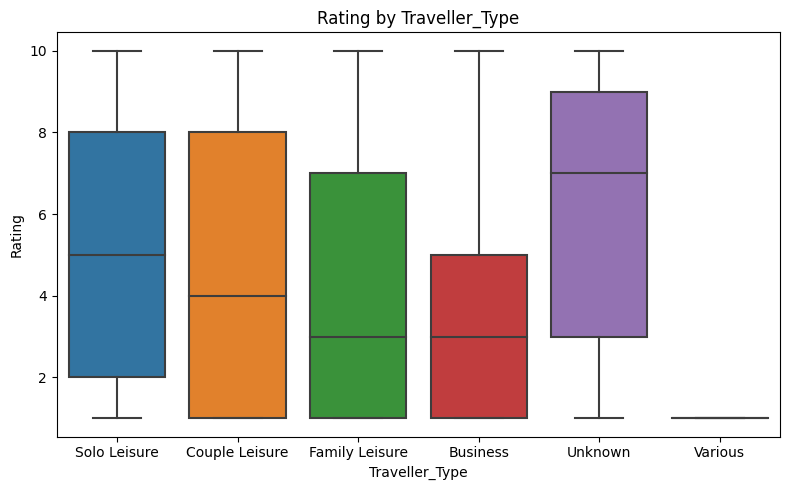

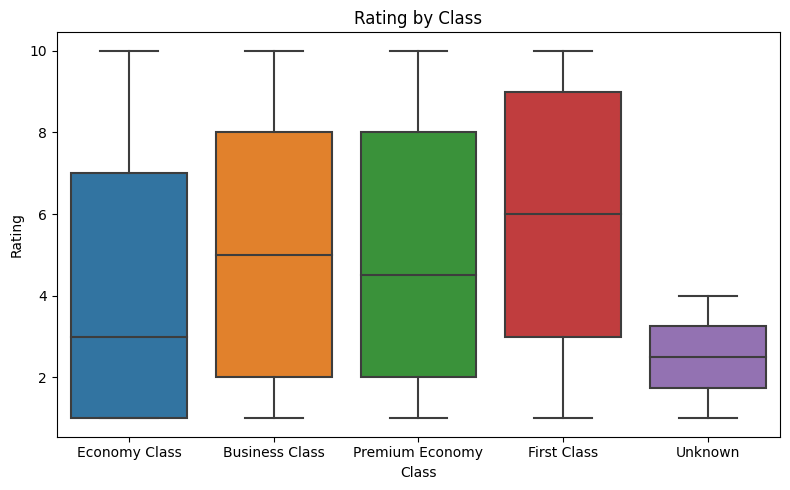

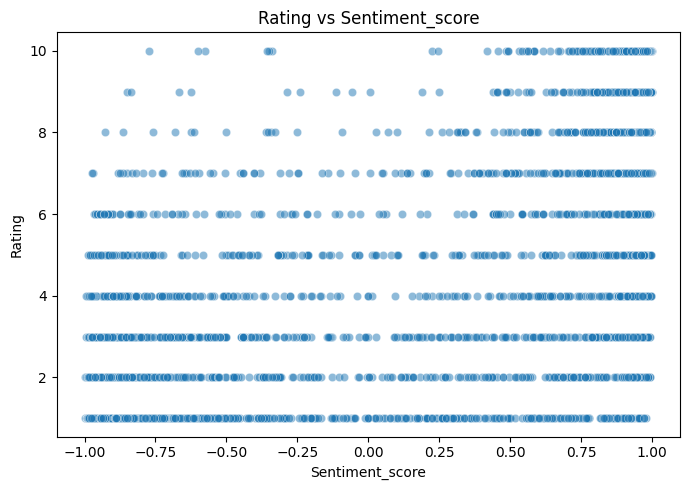

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot: Rating by Traveller_Type (rename 'Rating' if your rating column differs)
if "Traveller_Type" in reviews.columns and "Rating" in reviews.columns:
    plt.figure(figsize=(8,5))
    sns.boxplot(data=reviews, x="Traveller_Type", y="Rating")
    plt.title("Rating by Traveller_Type")
    plt.xlabel("Traveller_Type"); plt.ylabel("Rating")
    plt.tight_layout(); plt.show()

# Boxplot: Rating by Class
if "Class" in reviews.columns and "Rating" in reviews.columns:
    plt.figure(figsize=(8,5))
    sns.boxplot(data=reviews, x="Class", y="Rating")
    plt.title("Rating by Class")
    plt.xlabel("Class"); plt.ylabel("Rating")
    plt.tight_layout(); plt.show()

# Scatter: Sentiment vs Rating (if Sentiment_score exists)
if "Sentiment_score" in reviews.columns and "Rating" in reviews.columns:
    plt.figure(figsize=(7,5))
    sns.scatterplot(data=reviews, x="Sentiment_score", y="Rating", alpha=0.5)
    plt.title("Rating vs Sentiment_score")
    plt.xlabel("Sentiment_score"); plt.ylabel("Rating")
    plt.tight_layout(); plt.show()


### Takeaways (Feature Selection)
- `Traveller_Type` and `Class` show distinct rating ranges → keep both.
- `Sentiment_score` generally aligns with higher/lower ratings → keep when available.
- `route` and `flight_hour` retained to capture operational/behavioral signals observed in Q1–Q2.


## 6) Data Pre-processing & Feature Engineering

Each step is documented with:
- **What the step is**
- **Why we need it**
- **Its effect** on ranges/distributions/values.


### 6.a Missing Values

**What:** Handle NaNs (numeric → median; categorical → "Unknown").  
**Why:** Prevent bias and ensure consistent downstream processing.  
**Effect:** Fewer invalid rows; distributions may shift slightly if imputed.


In [17]:
# Make explicit processed copies to avoid overwriting raw inputs
reviews_proc = reviews.copy()
bookings_proc = bookings.copy()

# Reviews: simple missing handling (customize as needed)
for c in reviews_proc.columns:
    if reviews_proc[c].dtype.kind in "biufc":
        reviews_proc[c] = reviews_proc[c].fillna(reviews_proc[c].median())
    else:
        reviews_proc[c] = reviews_proc[c].fillna("Unknown")

# Bookings: simple missing handling (customize as needed)
for c in bookings_proc.columns:
    if bookings_proc[c].dtype.kind in "biufc":
        bookings_proc[c] = bookings_proc[c].fillna(bookings_proc[c].median())
    else:
        bookings_proc[c] = bookings_proc[c].fillna("Unknown")

print("Missing after (Reviews):")
display(reviews_proc.isna().sum().sort_values(ascending=False).head(10).rename("Missing"))
print("\nMissing after (Bookings):")
display(bookings_proc.isna().sum().sort_values(ascending=False).head(10).rename("Missing"))


Missing after (Reviews):


Passanger_Name     0
Flying_Date        0
Sentiment_label    0
Sentiment_score    0
Review_text        0
End_Address        0
End_Longitude      0
End_Latitude       0
Start_Address      0
Start_Longitude    0
Name: Missing, dtype: int64


Missing after (Bookings):


route                   0
flight_hour             0
flight_day              0
trip_type               0
sales_channel           0
num_passengers          0
purchase_lead           0
length_of_stay          0
wants_extra_baggage     0
wants_preferred_seat    0
Name: Missing, dtype: int64

In [18]:
# PLACE: AFTER reviews_proc is created (missing-values step)
from IPython.display import Markdown, display

cols_check = [c for c in ['Rating','Sentiment_score'] if c in reviews.columns]
if cols_check:
    before = reviews[cols_check].describe().round(3)
    after  = reviews_proc[cols_check].describe().round(3)
    display(Markdown("### Effect Check — Before vs After (Selected Numeric Columns)"))
    display(Markdown("**Before (raw reviews):**")); display(before)
    display(Markdown("**After (processed reviews):**")); display(after)


### Effect Check — Before vs After (Selected Numeric Columns)

**Before (raw reviews):**

,Rating,Sentiment_score
count,3575.00,3575.000
mean,4.79,0.169
std,3.17,0.791
min,1.00,-0.998
25%,2.00,-0.750
50%,4.00,0.502
75%,8.00,0.938
max,10.00,0.999


**After (processed reviews):**

,Rating,Sentiment_score
count,3575.00,3575.000
mean,4.79,0.169
std,3.17,0.791
min,1.00,-0.998
25%,2.00,-0.750
50%,4.00,0.502
75%,8.00,0.938
max,10.00,0.999


### 6.b Review Sentiment (Feature Engineering)

**What:** Convert text reviews into numeric sentiment (`Sentiment_score`, e.g., VADER).  
**Why:** Encodes emotional tone into a usable quantitative feature.  
**Effect:** Adds a numeric column (range ≈ -1 to 1).


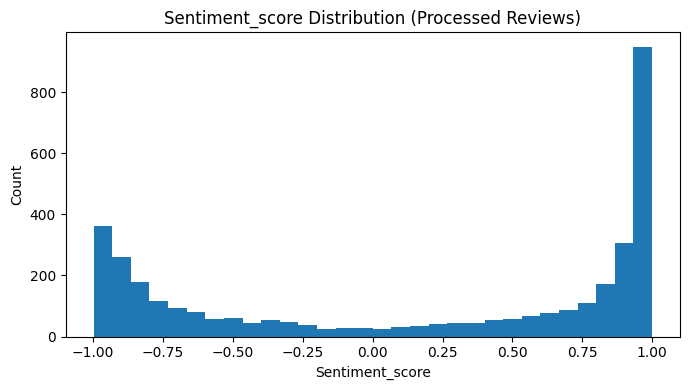

In [19]:
if "Sentiment_score" in reviews_proc.columns:
    ax = reviews_proc["Sentiment_score"].plot(kind="hist", bins=30, figsize=(7,4))
    ax.set_title("Sentiment_score Distribution (Processed Reviews)")
    ax.set_xlabel("Sentiment_score"); ax.set_ylabel("Count")
    plt.tight_layout(); plt.show()


### 6.c Encoding (for later modeling)

**What:** One-hot encode categories like `Traveller_Type`, `Class`, and `route`.  
**Why:** Many models require numeric inputs.  
**Effect:** Expands features; strings become binary indicator columns.


In [20]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

cat_cols = [c for c in ["Traveller_Type","Class"] if c in reviews_proc.columns]
if cat_cols:
    ohe = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
    enc = ohe.fit_transform(reviews_proc[cat_cols])
    enc_df = pd.DataFrame(enc, columns=ohe.get_feature_names_out(cat_cols), index=reviews_proc.index)
    reviews_enc_preview = pd.concat([reviews_proc.drop(columns=cat_cols), enc_df], axis=1)
    display(reviews_enc_preview.head(3))

if "route" in bookings_proc.columns:
    ohe2 = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
    enc2 = ohe2.fit_transform(bookings_proc[["route"]])
    enc2_df = pd.DataFrame(enc2, columns=ohe2.get_feature_names_out(["route"]), index=bookings_proc.index)
    bookings_enc_preview = pd.concat([bookings_proc.drop(columns=["route"]), enc2_df], axis=1)
    display(bookings_enc_preview.head(3))


,Passanger_Name,Flying_Date,Route,Rating,Verified,Review_title,Review_content,Start_Location,End_Location,Layover_Route,...,Traveller_Type_Couple Leisure,Traveller_Type_Family Leisure,Traveller_Type_Solo Leisure,Traveller_Type_Unknown,Traveller_Type_Various,Class_Business Class,Class_Economy Class,Class_First Class,Class_Premium Economy,Class_Unknown
0,Paige Boet,Jun-23,New Orleans to London,1,Trip Verified,The airline lost my luggage,The airline lost my luggage and was absolutely...,New Orleans,London,Unknown,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,S Layne,Mar-23,London to Amman,1,Trip Verified,fully refunded by our travel insurance,"We booked on the BA website, round trip flight...",London,Amman,Unknown,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,E Lanewoski,Unknown,Heathrow to Bodrum,2,Trip Verified,no boarding drinks provided,"First time flying with BA business class, neve...",London Heathrow,Bodrum,Unknown,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


,flight_hour,flight_day,trip_type,sales_channel,num_passengers,purchase_lead,length_of_stay,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,...,route_TGGXIY,route_TPETRZ,route_TPETWU,route_TPEURT,route_TPEVTE,route_TRZWUH,route_TRZXIY,route_TWUWUH,route_TWUXIY,route_URTXIY
0,6,Tue,RoundTrip,Internet,1,21,12,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7,Sat,RoundTrip,Internet,2,262,19,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Sat,RoundTrip,Internet,1,112,20,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 6.d Scaling (if needed later)

**What:** Standardize numeric features.  
**Why:** Some algorithms are scale-sensitive.  
**Effect:** Numeric ranges shift to standardized scales (e.g., z-scores).


In [21]:
from sklearn.preprocessing import StandardScaler
import numpy as np

num_cols = reviews_proc.select_dtypes(include=[np.number]).columns.tolist()
if "Rating" in num_cols:
    num_cols = [c for c in num_cols if c != "Rating"]  # keep target untouched (if later used)

if num_cols:
    scaler = StandardScaler()
    scaled = scaler.fit_transform(reviews_proc[num_cols])
    scaled_df = pd.DataFrame(scaled, columns=[f"{c}__z" for c in num_cols], index=reviews_proc.index)
    reviews_scaled_preview = pd.concat([reviews_proc.drop(columns=num_cols), scaled_df], axis=1)
    display(reviews_scaled_preview.head(3))


,Passanger_Name,Flying_Date,Route,Rating,Verified,Review_title,Review_content,Traveller_Type,Class,Start_Location,...,Start_Address,End_Address,Review_text,Sentiment_label,Start_Latitude__z,Start_Longitude__z,End_Latitude__z,End_Longitude__z,Sentiment_score__z,satisfaction__z
0,Paige Boet,Jun-23,New Orleans to London,1,Trip Verified,The airline lost my luggage,The airline lost my luggage and was absolutely...,Solo Leisure,Economy Class,New Orleans,...,"New Orleans, Orleans Parish, Louisiana, United...","London, Greater London, England, United Kingdom",The airline lost my luggage. The airline lost ...,Negative,-0.753736,-1.989967,0.584146,0.021226,-1.265987,-0.962385
1,S Layne,Mar-23,London to Amman,1,Trip Verified,fully refunded by our travel insurance,"We booked on the BA website, round trip flight...",Couple Leisure,Business Class,London,...,"London, Greater London, England, United Kingdom","عمان, ناحية عمان, لواء قصبة عمان, عمان, 11110,...",fully refunded by our travel insurance. We boo...,Positive,0.521614,0.045322,-0.473837,0.815361,0.694242,-0.962385
2,E Lanewoski,Unknown,Heathrow to Bodrum,2,Trip Verified,no boarding drinks provided,"First time flying with BA business class, neve...",Solo Leisure,Business Class,London Heathrow,...,"London Heathrow Airport, The Beacon Roundabout...","Bodrum, Muğla, Ege Bölgesi, Türkiye",no boarding drinks provided. First time flying...,Negative,0.519262,0.037832,-0.198853,0.628273,-1.221594,-0.962385


## Report Copy — Summary

**Q1 — Top 10 Routes:** Busiest routes identified; priority corridors for monitoring.  
**Q2 — Booking Hour Distribution:** Peaks reveal common customer activity windows.  
**Q3 — Traveller_Type × Class:** Clear rating differences justify keeping both as features.

**Feature Selection:** Keep `Traveller_Type`, `Class`, `route`, `flight_hour`, and `Sentiment_score` based on EDA evidence and interpretability.

**Preprocessing:** Missing values handled; sentiment engineered; categorical encoding previewed; scaling previewed if needed.


In [22]:
# PLACE: VERY LAST CELL — auto-build a report-ready summary
from IPython.display import Markdown, display

_top = bookings['route'].value_counts().head(10)
_peak3 = (bookings['flight_hour'].dropna().astype(int)
          .value_counts().sort_values(ascending=False).head(3))

_grp = (reviews.groupby(['Traveller_Type','Class'])['Rating']
        .agg(['mean','size']).rename(columns={'mean':'avg','size':'n'}))
_top5 = _grp.sort_values('avg', ascending=False).head(5)
_bot5 = _grp.sort_values('avg', ascending=True).head(5)

block = [
"## Report Copy — Summary",
"**Q1 — Top 10 Routes:**",
"\n".join([f"- {r}: {c:,}" for r,c in _top.items()]),
"",
"**Q2 — Booking Hour Distribution:**",
f"- Peak hours: {', '.join([f'{int(h)}:00' for h in _peak3.index])}",
f"- Counts: {', '.join([str(_peak3.loc[h]) for h in _peak3.index])}",
"",
"**Q3 — Traveller_Type × Class (Top/Bottom):**",
"Top 5:",
"\n".join([f"- {i[0]} — {i[1]}: avg={row.avg:.2f} (n={int(row.n)})" for i,row in _top5.iterrows()]),
"Bottom 5:",
"\n".join([f"- {i[0]} — {i[1]}: avg={row.avg:.2f} (n={int(row.n)})" for i,row in _bot5.iterrows()]),
"",
"**Feature Selection:** Keep `Traveller_Type`, `Class`, `route`, `flight_hour`, and `Sentiment_score` (EDA plots + numeric evidence).",
"**Preprocessing:** Missing handled; sentiment engineered; categorical encoding previewed; scaling previewed."
]
display(Markdown("\n\n".join(block)))


## Report Copy — Summary

**Q1 — Top 10 Routes:**

- AKLKUL: 2,680
- PENTPE: 924
- MELSGN: 842
- ICNSIN: 801
- DMKKIX: 744
- ICNSYD: 695
- DMKPER: 679
- DPSICN: 666
- DMKOOL: 655
- MELPEN: 649



**Q2 — Booking Hour Distribution:**

- Peak hours: 8:00, 12:00, 9:00

- Counts: 3165, 3163, 3133



**Q3 — Traveller_Type × Class (Top/Bottom):**

Top 5:

- Unknown — First Class: avg=7.13 (n=55)
- Solo Leisure — First Class: avg=6.63 (n=43)
- Couple Leisure — First Class: avg=5.98 (n=61)
- Unknown — Business Class: avg=5.98 (n=293)
- Unknown — Premium Economy: avg=5.92 (n=87)

Bottom 5:

- Various — Economy Class: avg=1.00 (n=1)
- Solo Leisure — Unknown: avg=1.00 (n=1)
- Business — Economy Class: avg=3.46 (n=256)
- Business — Business Class: avg=3.51 (n=278)
- Family Leisure — Premium Economy: avg=3.60 (n=25)



**Feature Selection:** Keep `Traveller_Type`, `Class`, `route`, `flight_hour`, and `Sentiment_score` (EDA plots + numeric evidence).

**Preprocessing:** Missing handled; sentiment engineered; categorical encoding previewed; scaling previewed.